In [16]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

connection = psycopg2.connect(
    host="localhost",   
    database="Database-Name", 
    user="User-Name",     
    password="Password"   
)

query = "SELECT * FROM investments"

data = pd.read_sql(query, connection)

connection.close()


C:\Users\LAKSHMI AYYAPPAN\AppData\Local\Temp\ipykernel_16248\4205530482.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              40 non-null     object 
 1   age                 40 non-null     int64  
 2   investment_avenues  40 non-null     object 
 3   mutual_funds        40 non-null     float64
 4   equity_market       40 non-null     float64
 5   debentures          40 non-null     float64
 6   government_bonds    40 non-null     float64
 7   fixed_deposits      40 non-null     float64
 8   ppf                 40 non-null     float64
 9   gold                40 non-null     float64
 10  stock_market        40 non-null     object 
 11  factor              40 non-null     object 
 12  objective           40 non-null     object 
 13  purpose             40 non-null     object 
 14  duration            40 non-null     object 
 15  invest_monitor      40 non-null     object 
 16  expect    

In [10]:
data.describe()

,age,mutual_funds,equity_market,debentures,government_bonds,fixed_deposits,ppf,gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,27.375000,2.575000,3.525000,5.700000,4.725000,3.475000,1.90000,6.100000
std,3.461788,1.174243,1.109111,1.667179,1.358497,1.709513,1.48151,1.104768
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000
25%,25.000000,2.000000,3.000000,5.000000,4.000000,2.750000,1.00000,6.000000
50%,27.000000,2.000000,4.000000,6.000000,5.000000,3.000000,1.00000,6.000000
75%,29.250000,3.000000,4.000000,7.000000,5.250000,5.000000,2.00000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.00000,7.000000


In [11]:
data.isnull().sum()

gender                0
age                   0
investment_avenues    0
mutual_funds          0
equity_market         0
debentures            0
government_bonds      0
fixed_deposits        0
ppf                   0
gold                  0
stock_market          0
factor                0
objective             0
purpose               0
duration              0
invest_monitor        0
expect                0
avenue                0
savings_objectives    0
reason_equity         0
reason_mutual         0
reason_bonds          0
reason_fd             0
sources               0
dtype: int64

Text(0, 0.5, 'Count Of Gender')

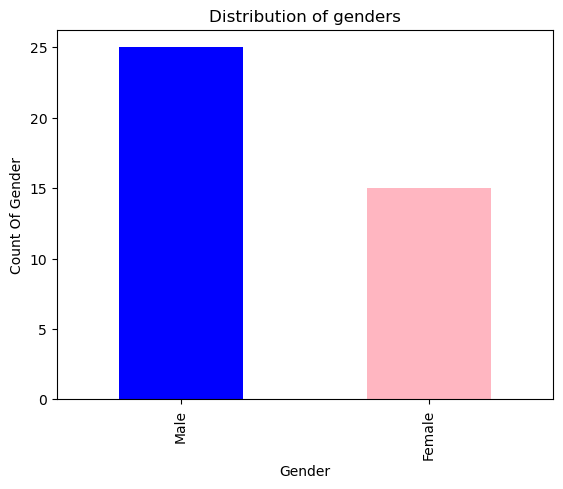

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
gender_count=data["gender"].value_counts()
gender_count.plot(kind="bar",color=['blue','lightpink'])
plt.title("Distribution of genders")
plt.xlabel("Gender")
plt.ylabel("Count Of Gender")

In [13]:
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['age', 'mutual_funds', 'equity_market', 'debentures',
       'government_bonds', 'fixed_deposits', 'ppf', 'gold'],
      dtype='object')

In [14]:
statiscal_analysis=data[numerical_columns].agg(["mean","median","std"])
statiscal_analysis

,age,mutual_funds,equity_market,debentures,government_bonds,fixed_deposits,ppf,gold
mean,27.375000,2.575000,3.525000,5.700000,4.725000,3.475000,1.90000,6.100000
median,27.000000,2.000000,4.000000,6.000000,5.000000,3.000000,1.00000,6.000000
std,3.461788,1.174243,1.109111,1.667179,1.358497,1.709513,1.48151,1.104768


In [18]:
total_avenues=data[['mutual_funds', 'equity_market', 'debentures', 'government_bonds', 'fixed_deposits', 'ppf', 'gold']].mode().iloc[0]
total_avenues

mutual_funds        2.0
equity_market       4.0
debentures          7.0
government_bonds    5.0
fixed_deposits      3.0
ppf                 1.0
gold                6.0
Name: 0, dtype: float64

In [19]:
most_frequent_avenue = total_avenues.idxmax()
print("investment avenue with the highest frequency: ",most_frequent_avenue)

investment avenue with the highest frequency:  debentures
